In [3]:
library(Rsafd)
data(hills)
attach(hills)


Intercept           X 
12.69917062  0.02488635

[1] "R-squared"        "0.64841010322887"


Call:
lm(formula = time ~ climb)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.616 -18.293  -4.215   5.103 127.706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.69917    7.71050   1.647    0.109    
climb        0.02489    0.00319   7.801 5.45e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30.12 on 33 degrees of freedom
Multiple R-squared:  0.6484,	Adjusted R-squared:  0.6378 
F-statistic: 60.86 on 1 and 33 DF,  p-value: 5.452e-09


,2.5 %,97.5 %
(Intercept),-2.98795389,28.38629513
climb,0.01839614,0.03137655


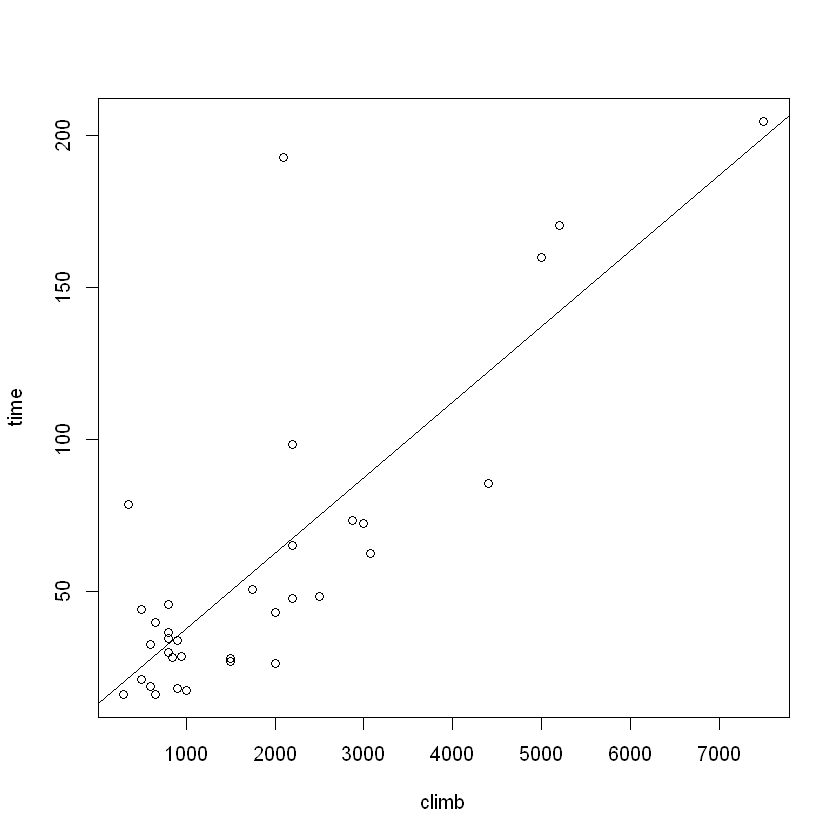

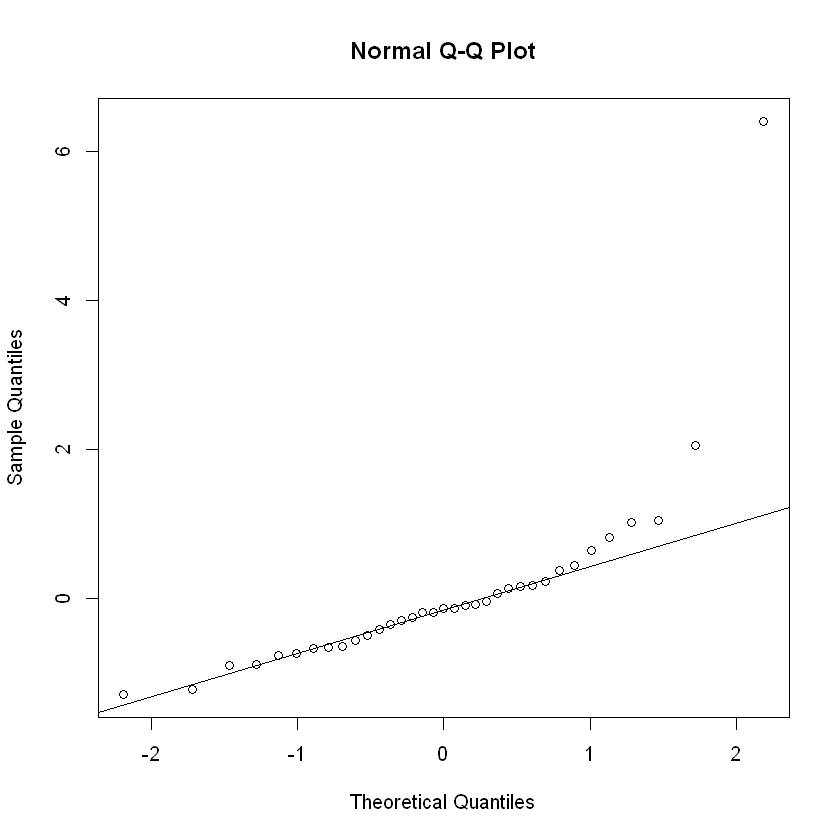

Intercept         X 
-4.840720  8.330456

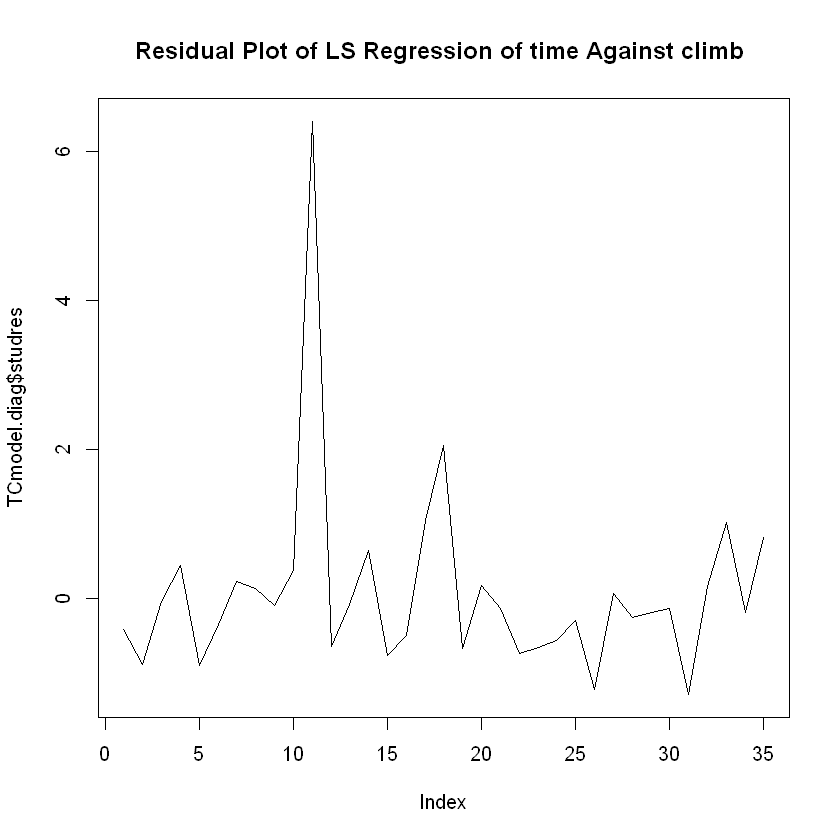

[1] "R-squared"         "0.845644373843519"


Call:
lm(formula = time ~ dist)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.745  -9.037  -4.201   2.849  76.170 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.8407     5.7562  -0.841    0.406    
dist          8.3305     0.6196  13.446 6.08e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.96 on 33 degrees of freedom
Multiple R-squared:  0.8456,	Adjusted R-squared:  0.841 
F-statistic: 180.8 on 1 and 33 DF,  p-value: 6.084e-15


,2.5 %,97.5 %
(Intercept),-16.551867,6.870427
dist,7.069964,9.590948


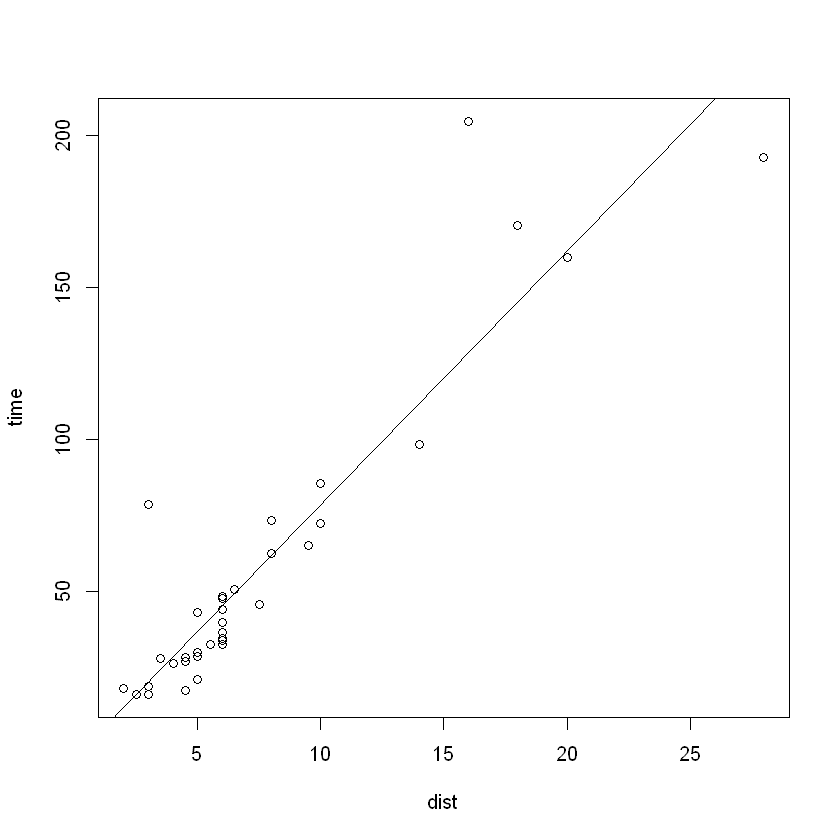

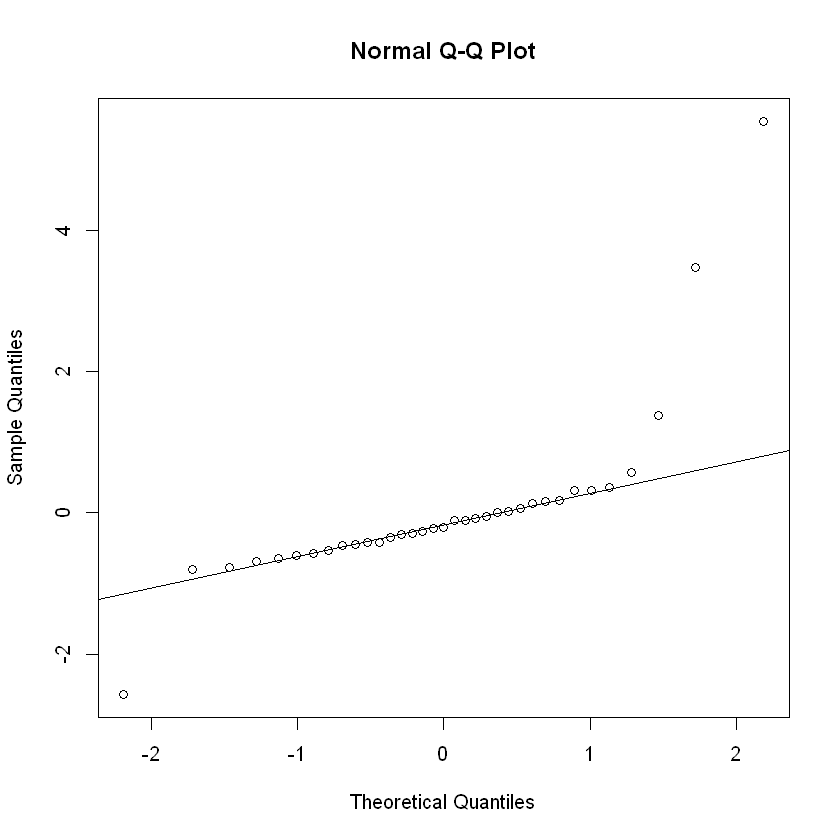

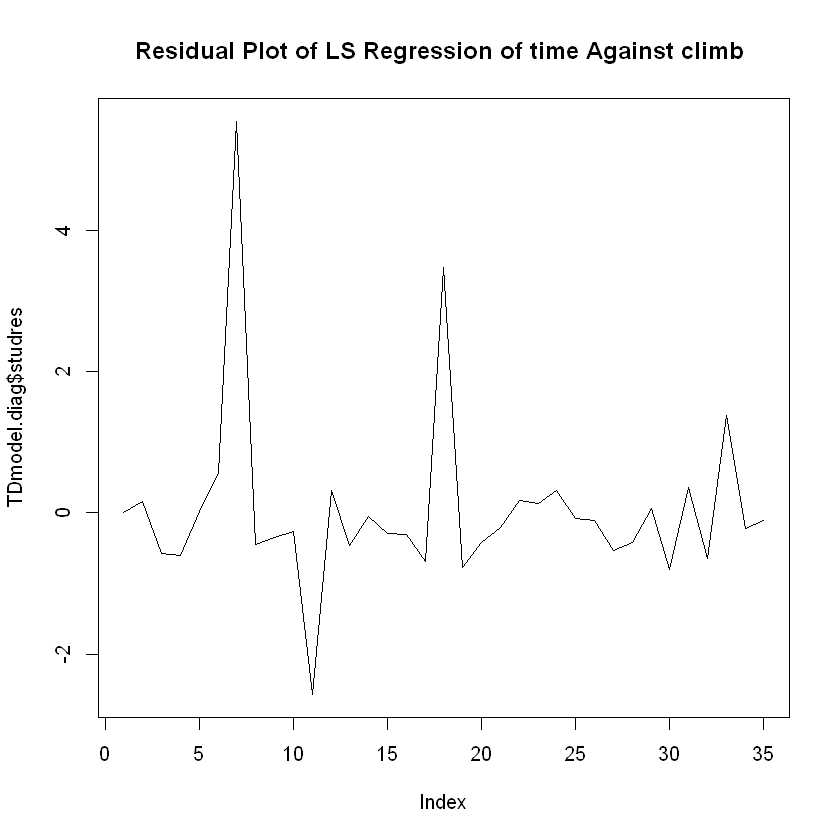

In [36]:
# Question 1.1

TCl2 <- lsfit(climb, time)
TCl2$coef
plot(climb, time)
abline(TCl2)

# R-squared
# R-square is 0.6484
SSEct <-  sum(TCl2$residuals * TCl2$residuals)
SSTOct <-  sum((time - mean(time)) ^ 2 )
c("R-squared", 1-SSEct/SSTOct)


TCmodel <- lm(time ~ climb)
summary(TCmodel)
confint(TCmodel)
# Yes 0 is in the 95% CI: -2.98795389 28.38629513

TCmodel.diag<-lm.diag(TCmodel)   
# plot(TCmodel.diag$hat,type="l")
qqnorm(TCmodel.diag$studres)
plot(TCmodel.diag$studres,type="l",main="Residual Plot of LS Regression of time Against climb ")



TDl2 <- lsfit(dist, time)
TDl2$coef
plot(dist,time)
abline(TDl2)

# R-squared
# R-square is 0.8456
SSEct <-  sum(TDl2$residuals * TDl2$residuals)
SSTOct <-  sum((time - mean(time)) ^ 2 )
c("R-squared", 1-SSEct/SSTOct)

TDmodel <- lm(time ~ dist)
summary(TDmodel)
confint(TDmodel)
# Yes 0 is in the 95% CI:  -16.551867  6.870427
TDmodel.diag<-lm.diag(TDmodel)   
# plot(TDmodel.diag$hat,type="l")
qqnorm(TDmodel.diag$studres)
plot(TDmodel.diag$studres,type="l",main="Residual Plot of LS Regression of time Against climb ")



# The R-square of the "time again dist" is higher than that of "time against climb"
# This means that the higher percentage of the variation of responce variable "time" can be explained by the linear model of  dist than by climb

(Intercept)           x 
 8.80172414  0.02382759

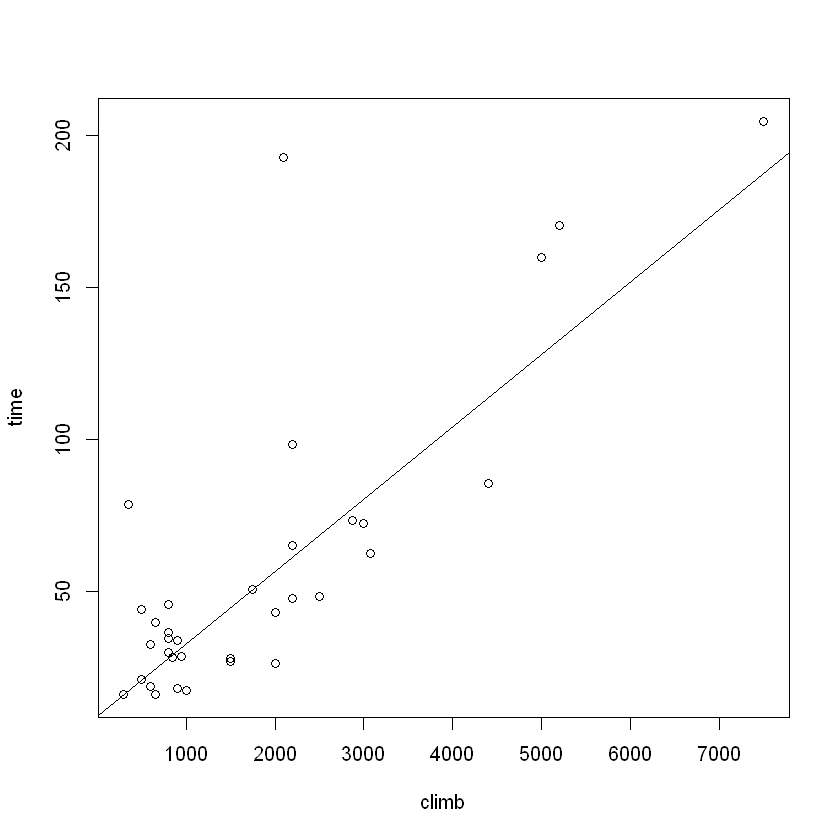

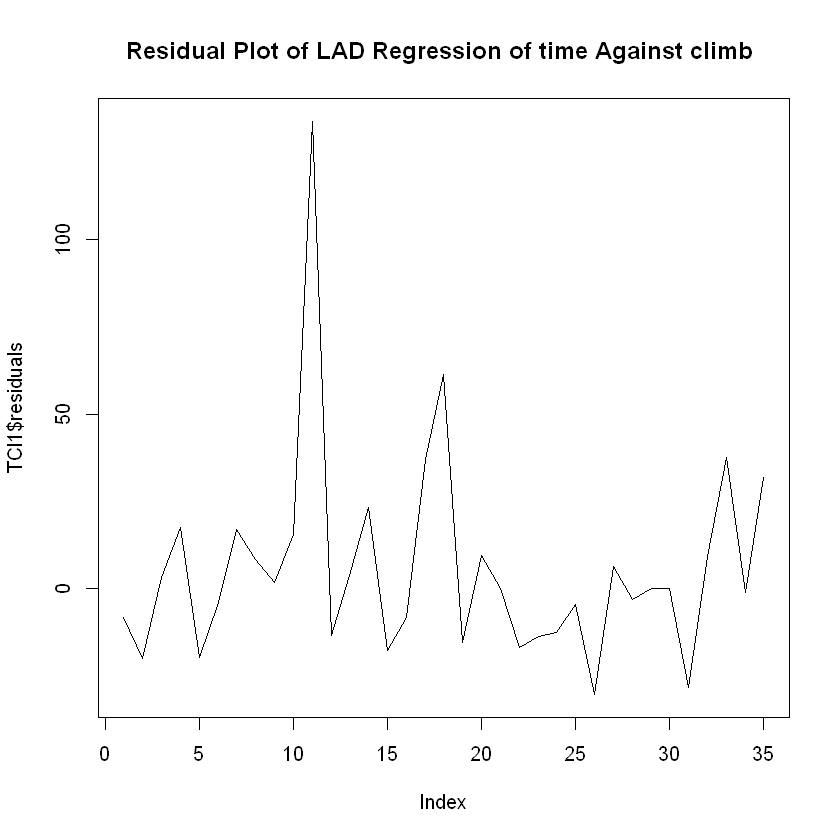

[1] "Analog R-squared"  "0.633314436437544"

(Intercept)           x 
  -8.022727    8.027273

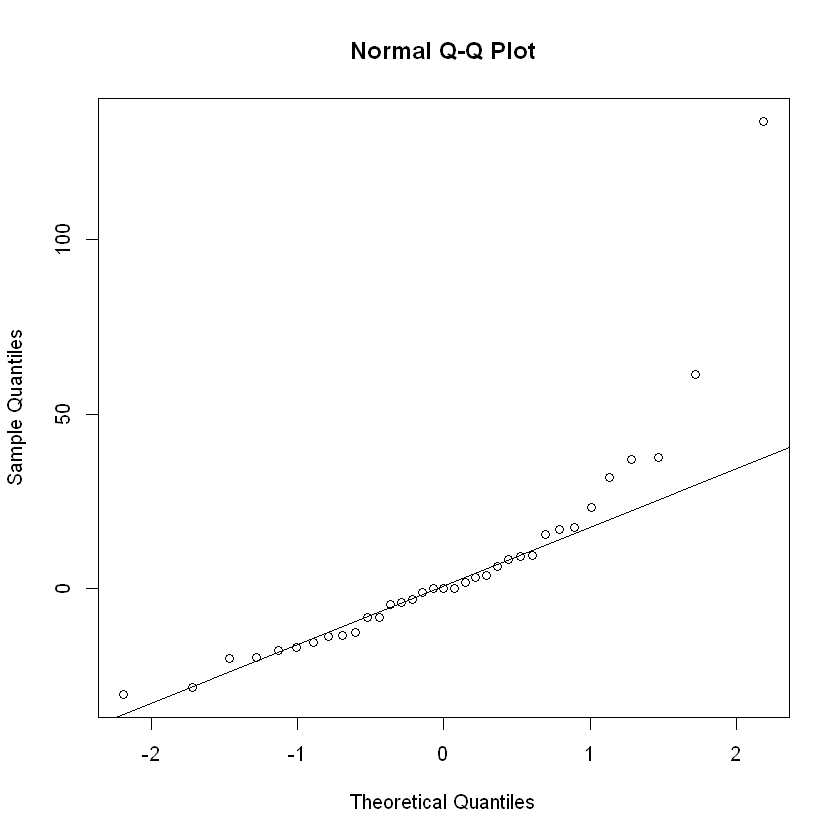

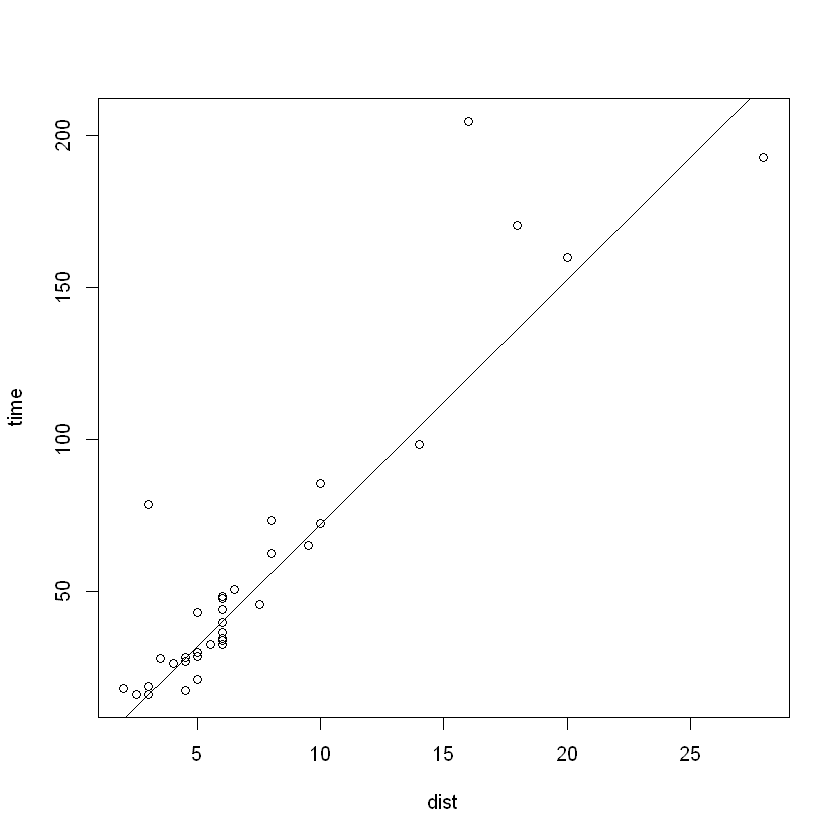

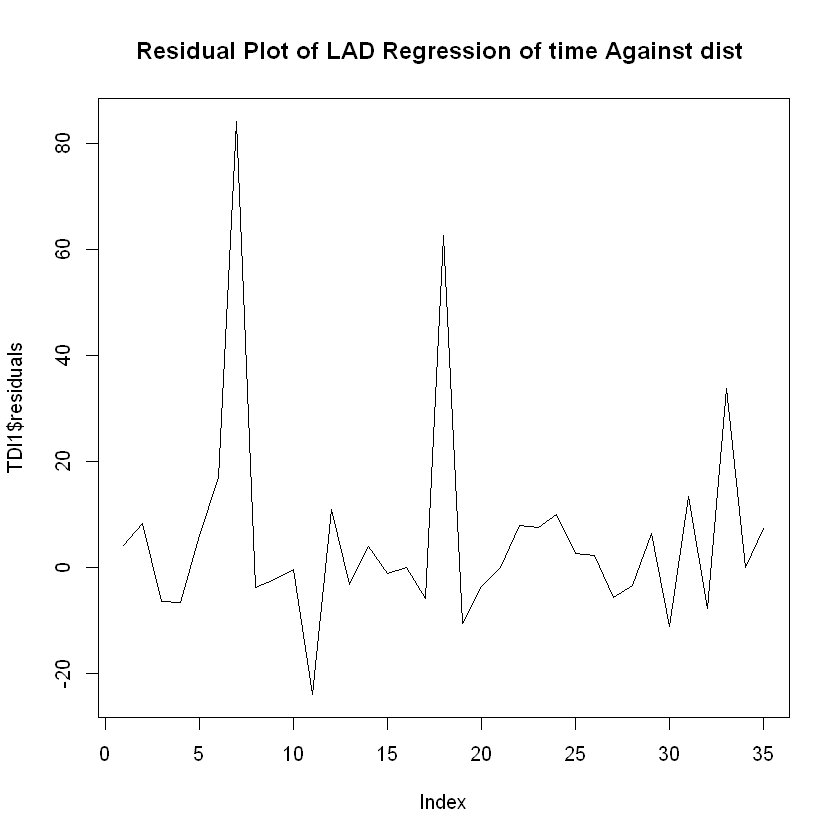

[1] "Analog R-squared"  "0.832248451858142"

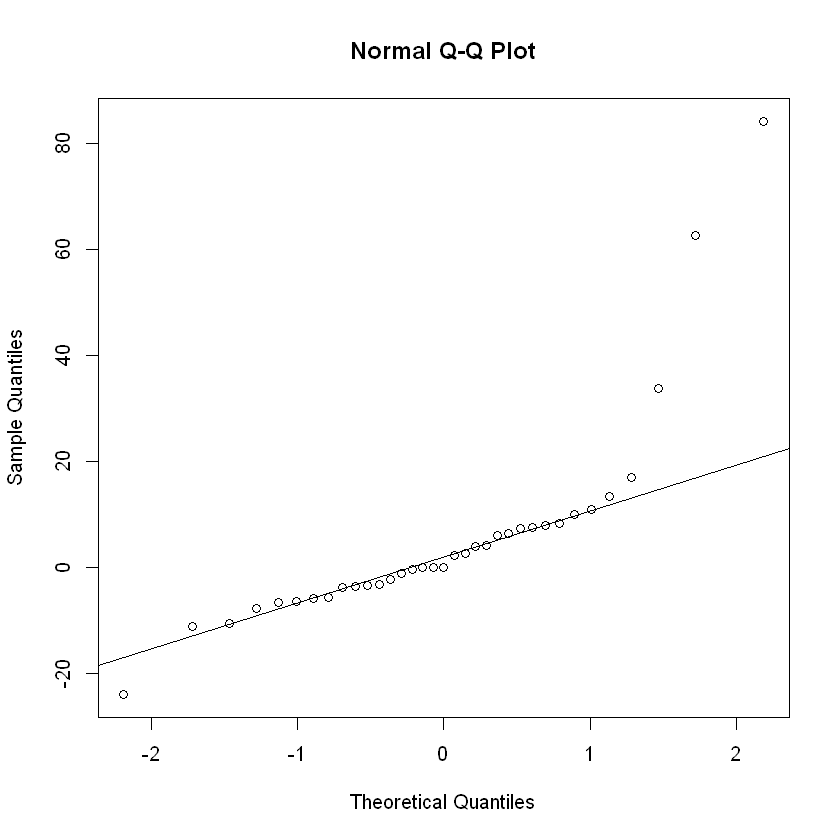

In [38]:
# Question 1.2


TCl1 <- l1fit(climb, time)
TCl1$coef
plot(climb, time)
abline(TCl1)
plot(TCl1$residuals,type="l",main="Residual Plot of LAD Regression of time Against climb ")

qqnorm(TCl1$residuals)

# For the LS regrssion it is 
# Intercept
# 12.6991706179155
# X
# 0.0248863483438202

# For LAD regression, it is 
# (Intercept)
# 8.80172413793103
# x
# 0.0238275862068966

# The later one has lower slope and lower intercept. They are different


# Similaly we analog R-squared as SSR / SSTO = 1 - SSE / SSTO
SSEct <-  sum(TCl1$residuals * TCl1$residuals)
SSTOct <-  sum((time - mean(time)) ^ 2 )

# 'Analog R-squared' '0.633314436437544'
c("Analog R-squared", 1-SSEct/SSTOct)

TDl1 <- l1fit(dist, time)
TDl1$coef
plot(dist,time)
abline(TDl1)
plot(TDl1$residuals,type="l",main="Residual Plot of LAD Regression of time Against dist ")

qqnorm(TDl1$residuals)

# For the LS regrssion it is 
# Intercept
# -4.84072018506534
# X
# 8.33045619156466

# For LAD regression, it is 
# (Intercept)
# -8.02272727272728
# x
# 8.02727272727273

# The later one has lower slope and lower intercept. They are different

# Similaly we analog R-squared as SSR / SSTO = 1 - SSE / SSTO
SSEct <-  sum(TDl1$residuals * TDl1$residuals)
SSTOct <-  sum((time - mean(time)) ^ 2 )

# 'Analog R-squared' '0.832248451858142'
c("Analog R-squared", 1-SSEct/SSTOct)

In [40]:
# Question 1.3

#predictions
NEWdist<-26.2 #interpolation
predi2<-TDl2$coef[1]+TDl2$coef[2]*NEWdist
predi1<-TDl1$coef[1]+TDl1$coef[2]*NEWdist
round(c(predi2,predi1,predi2 - predi1),0)

Intercept (Intercept)   Intercept 
        213         202          11

Intercept         X 
-4.840720  8.330456

Intercept         X 
 7.157545  6.357252

(Intercept)           x 
  -8.022727    8.027273

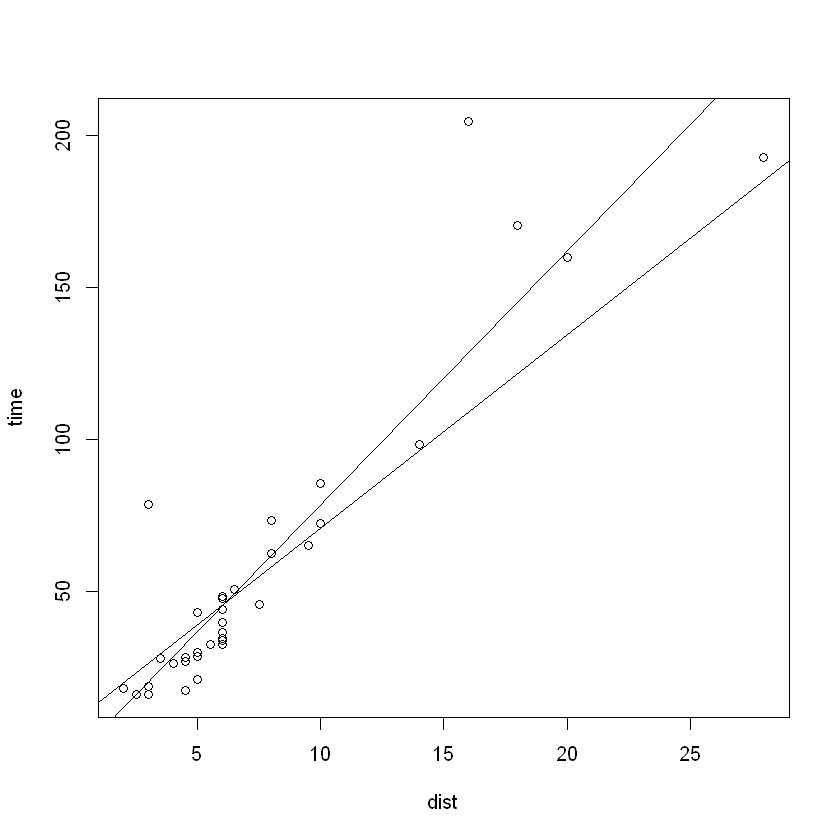

(Intercept)           x 
  -8.022727    8.027273

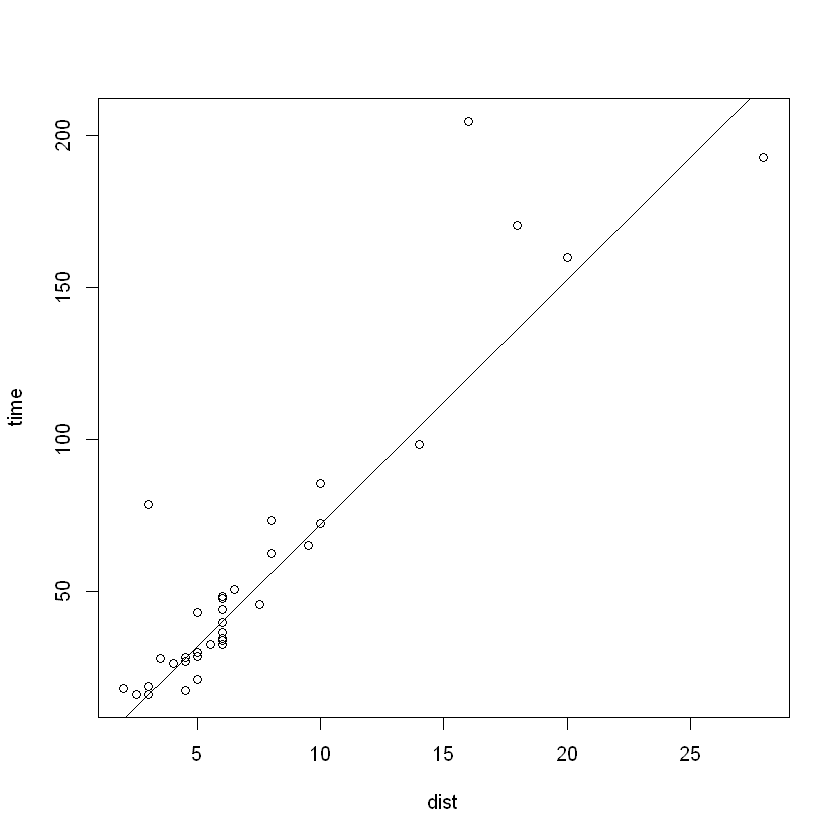

In [55]:
# Question 1.4

Ttime <- time
Ttime[11] <- 92.667

TDl2 <- lsfit(dist, time)
TDl2$coef
plot(dist, time)
abline(TDl2)

TTDl2 <- lsfit(dist, Ttime)
TTDl2$coef

abline(TTDl2)


TDl1 <- l1fit(dist, time)
TDl1$coef
plot(dist, time)
abline(TDl1)

TTDl1 <- l1fit(dist, Ttime)
TTDl1$coef

abline(TTDl1)


# The RS regresssion changed alot, but the LAD regression almost did not change.
# This is because LAD is more robust than LS


Call:
lm(formula = time ~ climb + dist)

Residuals:
    Min      1Q  Median      3Q     Max 
-16.215  -7.129  -1.186   2.371  65.121 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -8.992039   4.302734  -2.090   0.0447 *  
climb        0.011048   0.002051   5.387 6.45e-06 ***
dist         6.217956   0.601148  10.343 9.86e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14.68 on 32 degrees of freedom
Multiple R-squared:  0.9191,	Adjusted R-squared:  0.914 
F-statistic: 181.7 on 2 and 32 DF,  p-value: < 2.2e-16



Call:
lm(formula = time ~ climb)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.616 -18.293  -4.215   5.103 127.706 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.69917    7.71050   1.647    0.109    
climb        0.02489    0.00319   7.801 5.45e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 30.12 on 33 degrees of freedom
Multiple R-squared:  0.6484,	Adjusted R-squared:  0.6378 
F-statistic: 60.86 on 1 and 33 DF,  p-value: 5.452e-09


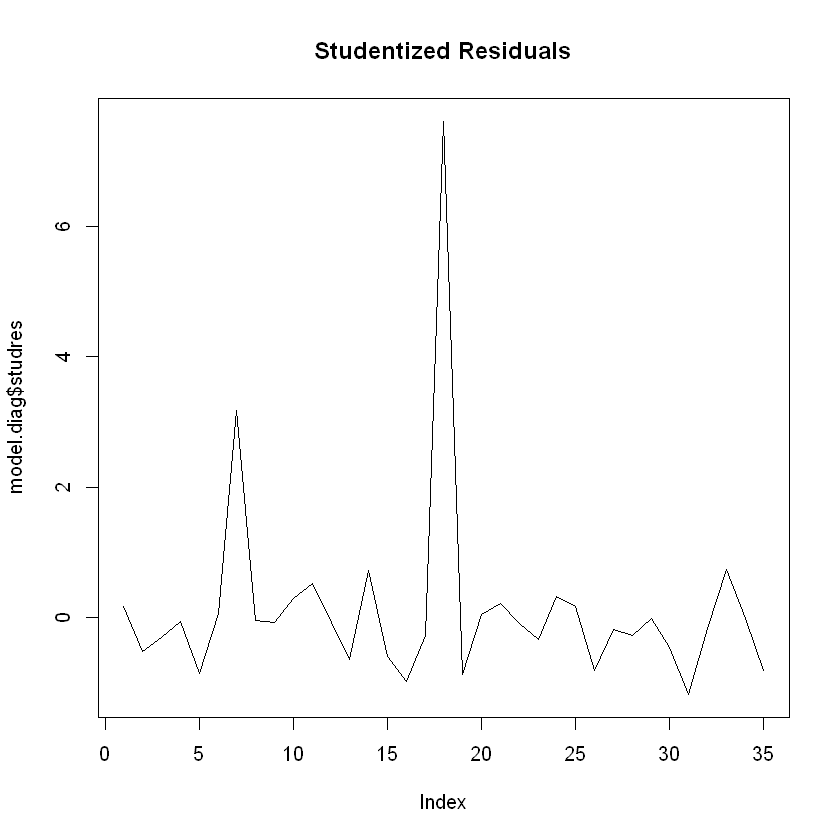


Call:
lm(formula = time ~ dist)

Residuals:
    Min      1Q  Median      3Q     Max 
-35.745  -9.037  -4.201   2.849  76.170 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.8407     5.7562  -0.841    0.406    
dist          8.3305     0.6196  13.446 6.08e-15 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 19.96 on 33 degrees of freedom
Multiple R-squared:  0.8456,	Adjusted R-squared:  0.841 
F-statistic: 180.8 on 1 and 33 DF,  p-value: 6.084e-15


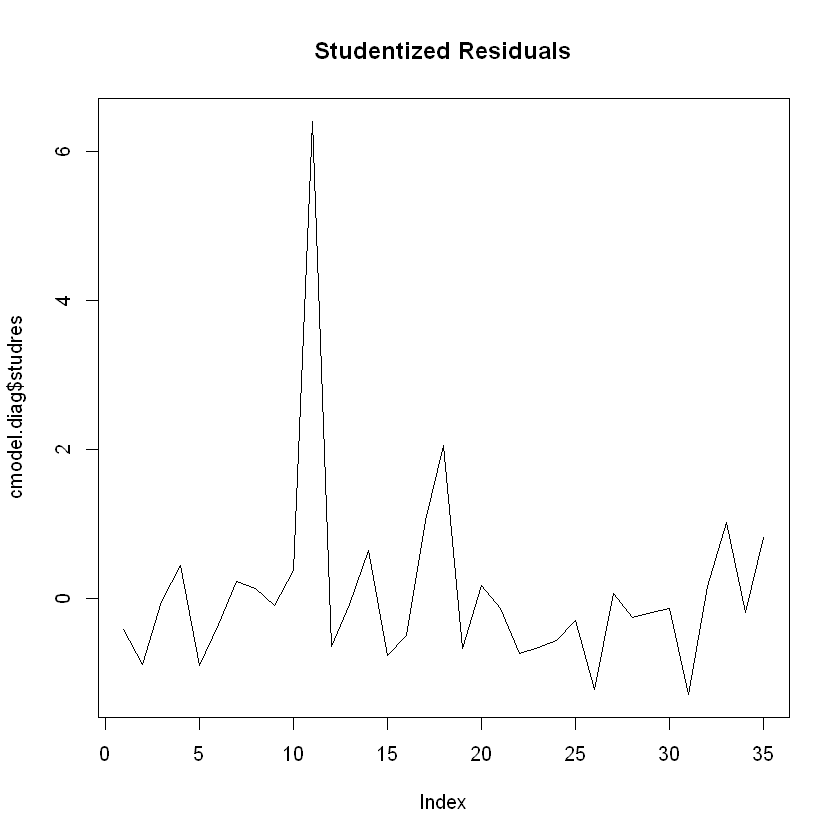

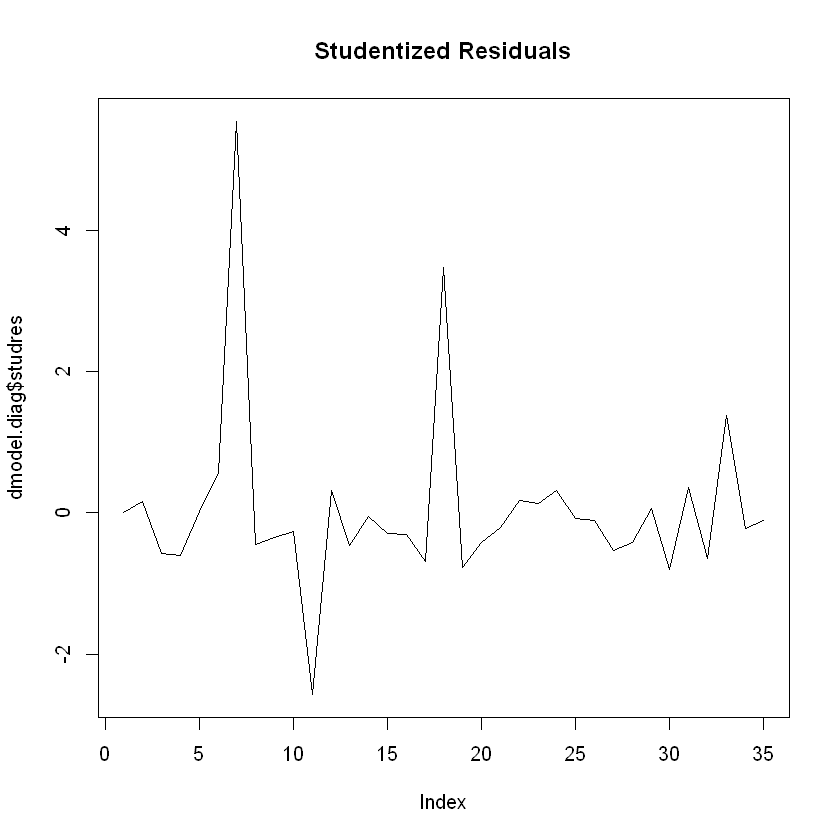

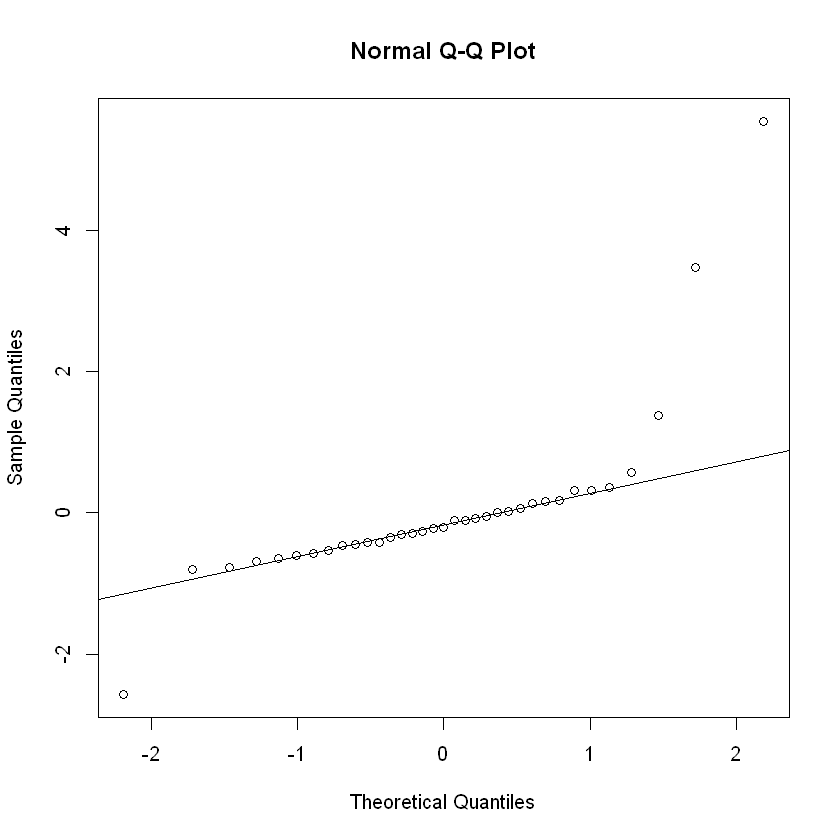

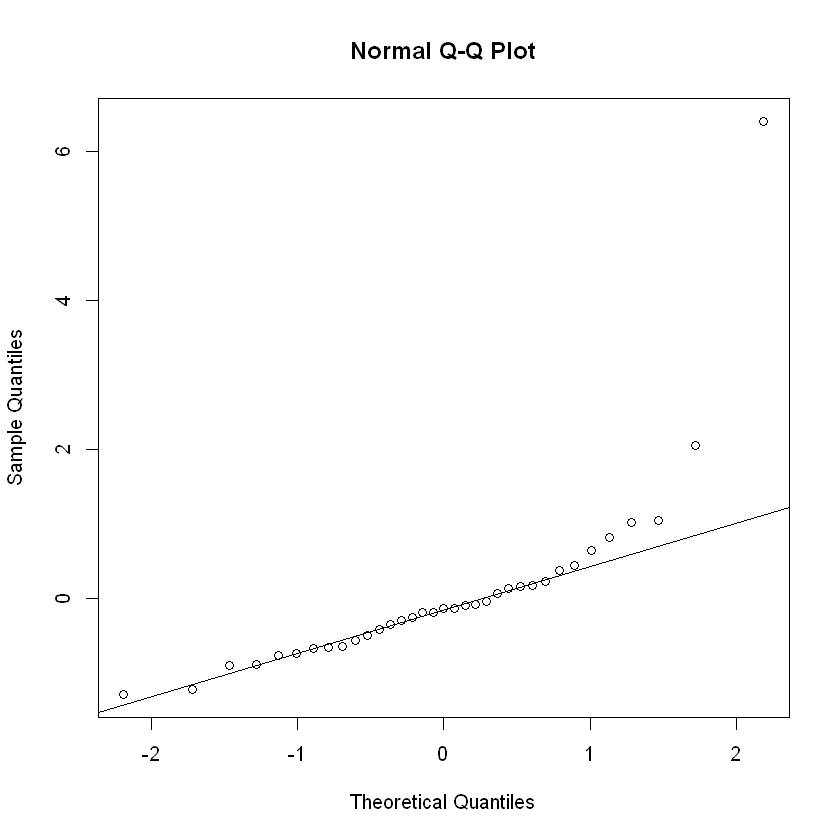

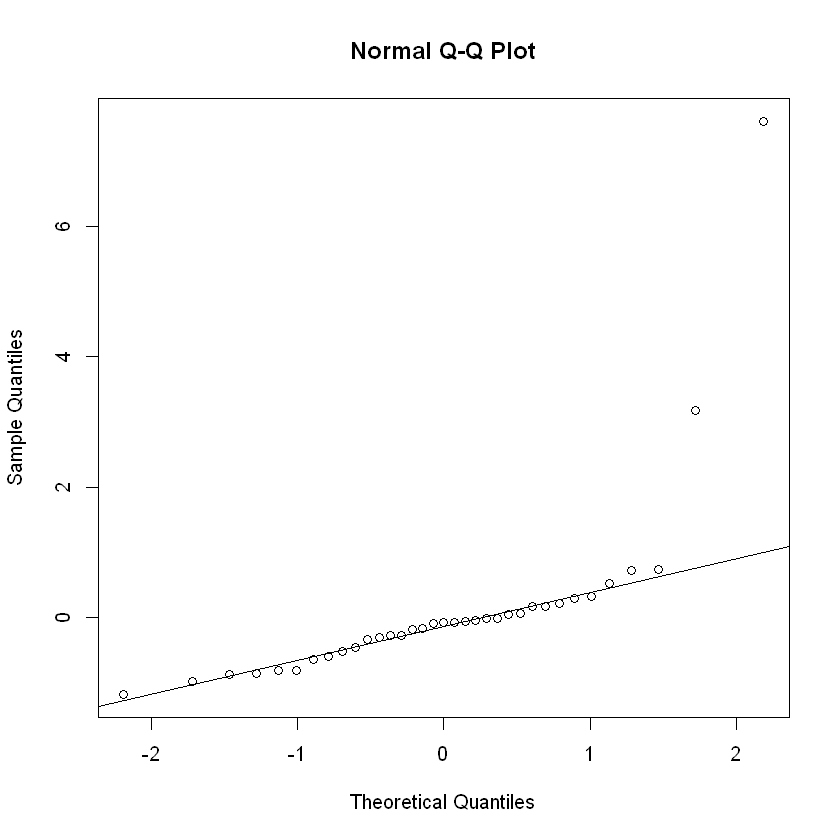

In [61]:
# Question 1.5 

model <- lm(time ~ climb + dist)
summary(model)
model.diag<-lm.diag(model)   
plot(model.diag$studres,type="l",main="Studentized Residuals")

cmodel <- lm(time ~ climb )
summary(cmodel)
cmodel.diag<-lm.diag(cmodel)   
plot(cmodel.diag$studres,type="l",main="Studentized Residuals")

dmodel <- lm(time ~  dist)
summary(dmodel)
dmodel.diag<-lm.diag(dmodel)   
plot(dmodel.diag$studres,type="l",main="Studentized Residuals")

# The slopes in two variable model and the repective slope in one variable model are different.
# Because they use different model, they give different ways to estimate time. 

qqnorm(dmodel.diag$studres)
qqnorm(cmodel.diag$studres)
qqnorm(model.diag$studres)

# The R-aquareds are 
# joint model: 0.9191
# climb model: 0.6484
# dist model: 0.8456

# we can see that the two variable model may give a better estimation of the varience of the response variable "time"
# because the R-squared is largest. 
# Meanwhile the distribution of error is more close to normal on the upper tail according to the qq-plot

In [66]:
# Question 2.1

GoogleData <- read.table("Google.csv",sep=',',header=TRUE)
attach(GoogleData)


summary(GoogleData) 
  
rG <- GoogleData$rGoog
rf <- GoogleData$rf
rG_ex <- rG - rf
rM_ex <- GoogleData$rM_ex
rSmB <- GoogleData$rSmB
rHmL <- GoogleData$rHmL


Onefactor <- lm(rG_ex ~ rM_ex)
summary(Onefactor)


The following objects are masked _by_ .GlobalEnv:

    rf, rHmL, rM_ex, rSmB

The following objects are masked from GoogleData (pos = 3):

    Date, rf, rGoog, rHmL, rM_ex, rSmB

The following objects are masked from GoogleData (pos = 4):

    Date, rf, rGoog, rHmL, rM_ex, rSmB

The following objects are masked from GoogleData (pos = 5):

    Date, rf, rGoog, rHmL, rM_ex, rSmB

The following objects are masked from GoogleData (pos = 6):

    Date, rf, rGoog, rHmL, rM_ex, rSmB



      Date         rGoog                rf                rM_ex          
 1/1/10 :  1   Min.   :-0.15692   Min.   :0.0000000   Min.   :-0.116557  
 1/1/11 :  1   1st Qu.:-0.02889   1st Qu.:0.0000000   1st Qu.:-0.007526  
 1/1/12 :  1   Median : 0.01802   Median :0.0001000   Median : 0.012519  
 1/1/13 :  1   Mean   : 0.01688   Mean   :0.0001823   Mean   : 0.010693  
 1/1/14 :  1   3rd Qu.: 0.05998   3rd Qu.:0.0001000   3rd Qu.: 0.032909  
 1/1/15 :  1   Max.   : 0.18392   Max.   :0.0014000   Max.   : 0.102307  
 (Other):107                                                             
      rSmB                rHmL           
 Min.   :-0.044100   Min.   :-0.0727000  
 1st Qu.:-0.017100   1st Qu.:-0.0157000  
 Median : 0.003400   Median :-0.0026000  
 Mean   : 0.001947   Mean   :-0.0004372  
 3rd Qu.: 0.014900   3rd Qu.: 0.0110000  
 Max.   : 0.061100   Max.   : 0.0844000  
                                         


Call:
lm(formula = rG_ex ~ rM_ex)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.155482 -0.031877  0.000038  0.030802  0.190855 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.006211   0.005468   1.136    0.258    
rM_ex       0.980868   0.141846   6.915 3.13e-10 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05585 on 111 degrees of freedom
Multiple R-squared:  0.3011,	Adjusted R-squared:  0.2948 
F-statistic: 47.82 on 1 and 111 DF,  p-value: 3.133e-10


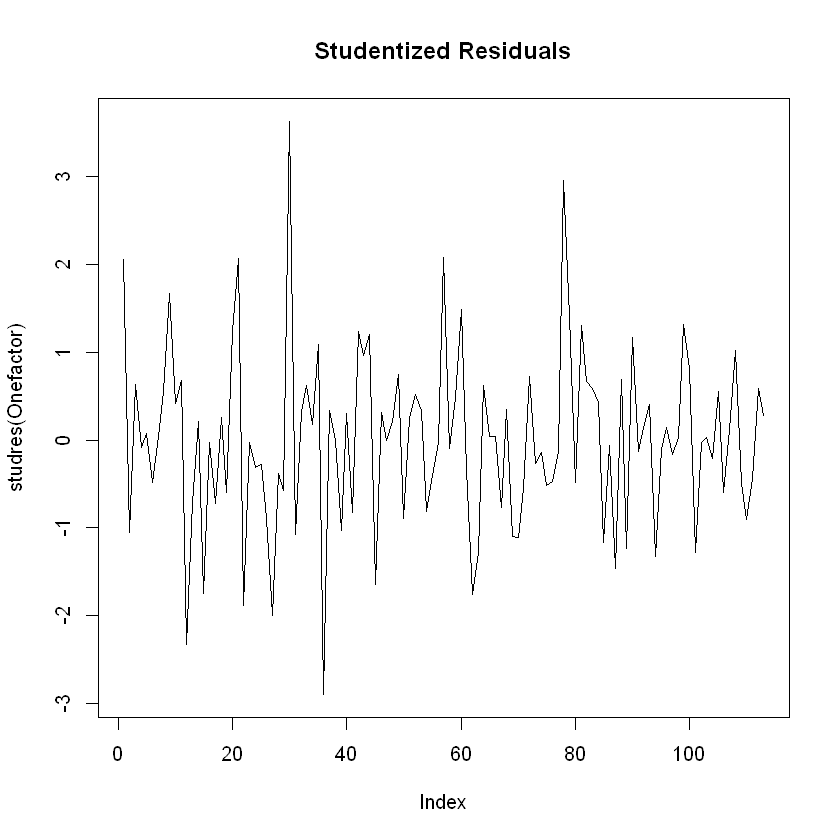

[1] -0.0878969

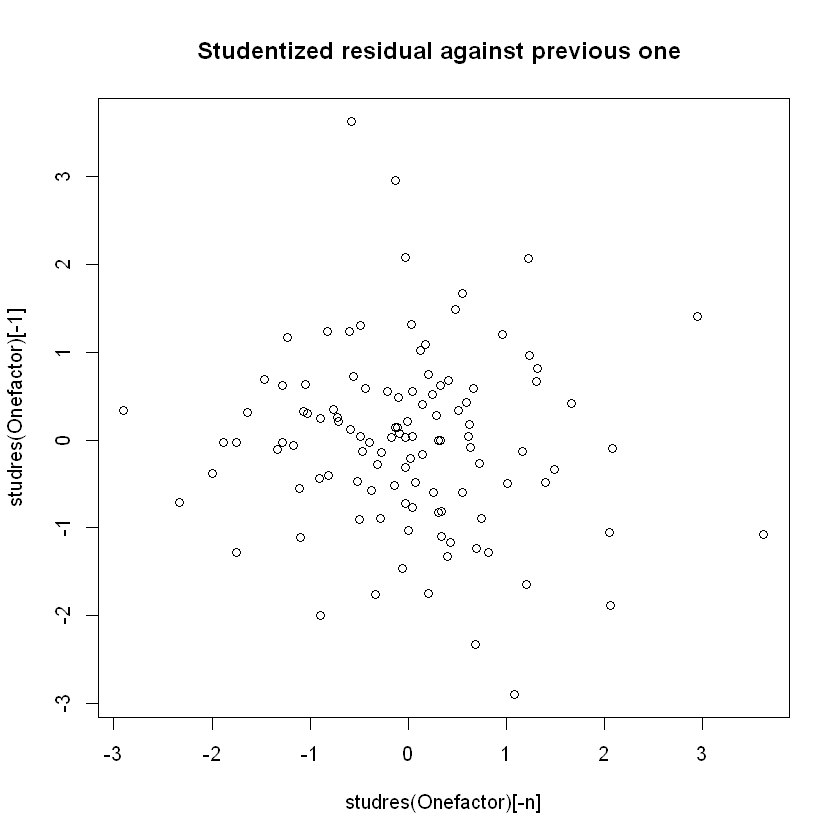

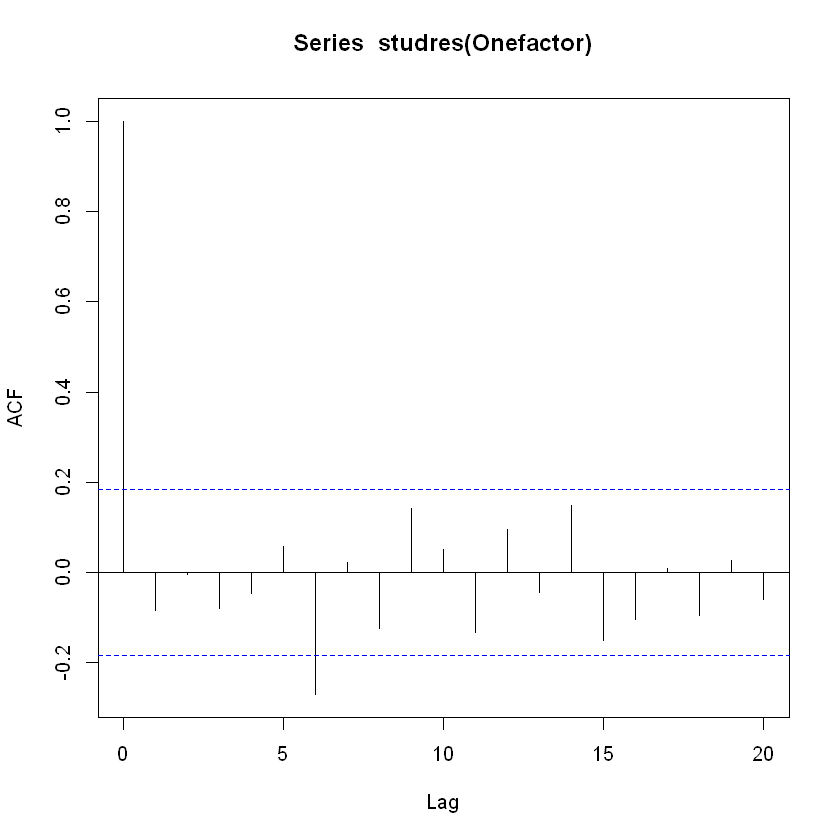

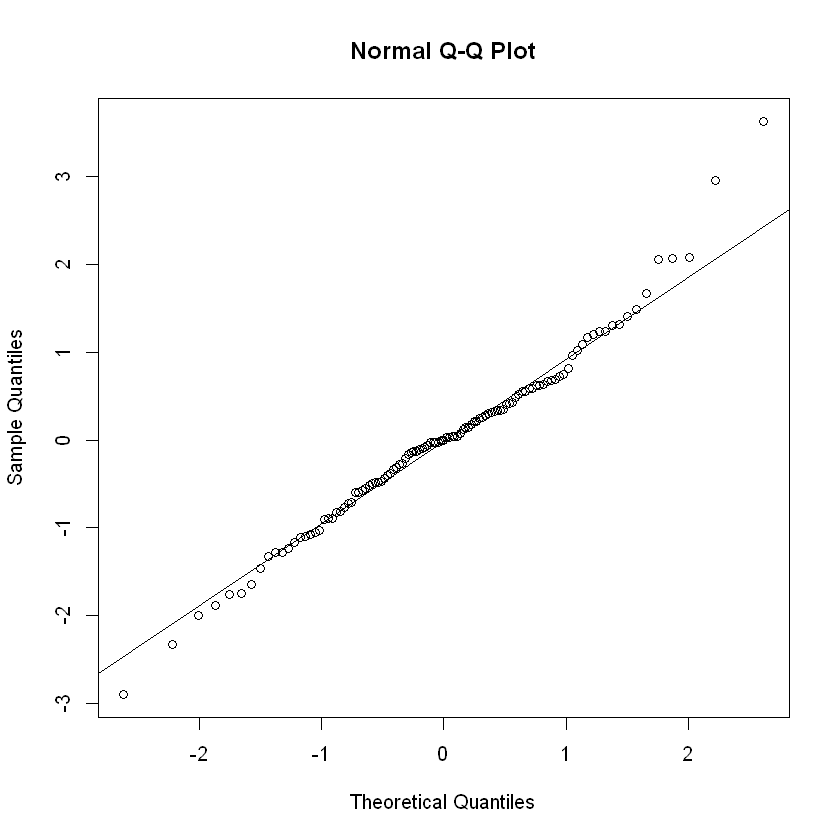

In [71]:
# Question 2.2
# 1.
# Acordding to the lecture notes, this testing is equicalent to test beta = 0
# which we reject the null hypothesis, because the t-value of is 6.915, far larger than 2.
# So it is statistically significant in explaining the variation in the response

# 2. 
# The t-value of intercept is 1.136, thich is smaller than 2 and larger than -2. So Alpha is not significantly different from 0

# 3. 
# 95% CI of beta is [0.980868 - 2 * 0.141846, 0.980868 + 2 * 0.141846]. 1 is in the interval, so we know that beta is not significantly different from 1

# 4. Model diagnostics
# Check the residuals: they should be weakly correlated and roughly normal
library(MASS)
n <- length(rG_ex) - 1
plot(studres(Onefactor),type="l",main="Studentized Residuals")

plot(studres(Onefactor)[-n],studres(Onefactor)[-1],main="Studentized residual against previous one ")
cor(studres(Onefactor)[-n],studres(Onefactor)[-1])
acf(studres(Onefactor), type = "correlation", plot = TRUE)
qqnorm(studres(Onefactor))

# Basically the errors are weakly correlated accroding to ACF. Except for lag = 6. which we tend to think that 
# happen by chance.

# The left and right tails of the error distribution are heavier than normal.Which means this is not a good git that sarisfy the assumptions
# (iid and norm)


Call:
lm(formula = rG_ex ~ rM_ex + rSmB + rHmL)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.160206 -0.031001  0.002086  0.027475  0.184254 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.004660   0.005269   0.884  0.37847    
rM_ex        1.174789   0.146748   8.005  1.4e-12 ***
rSmB        -0.402845   0.221151  -1.822  0.07126 .  
rHmL        -0.600377   0.216841  -2.769  0.00662 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.05346 on 109 degrees of freedom
Multiple R-squared:  0.3711,	Adjusted R-squared:  0.3538 
F-statistic: 21.44 on 3 and 109 DF,  p-value: 5.447e-11


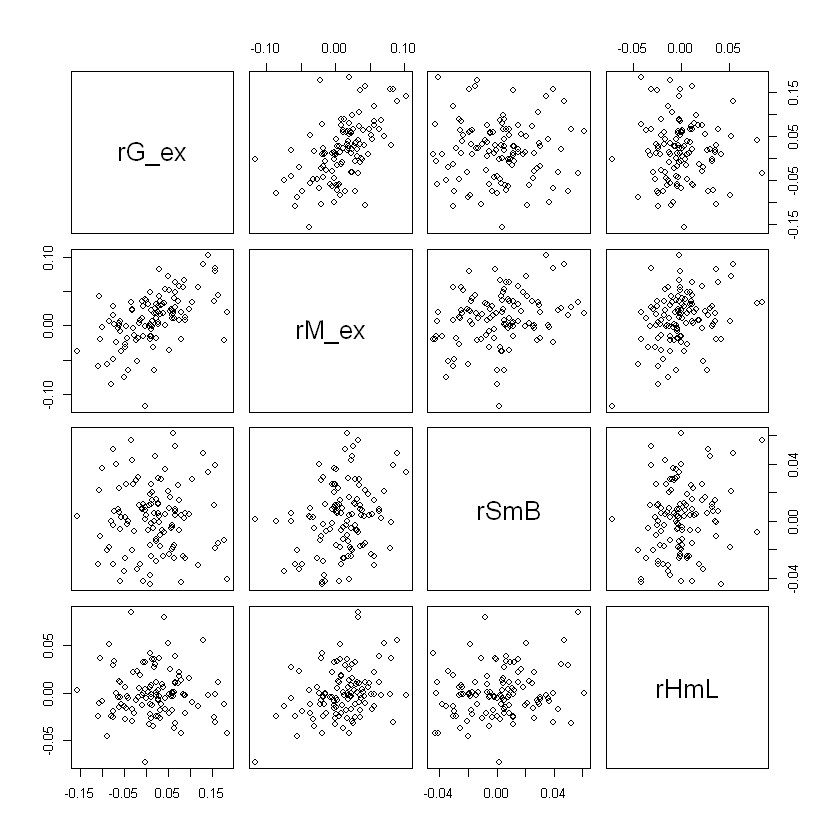

In [74]:
# Question 2.3
pairs(cbind(rG_ex,rM_ex,rSmB,rHmL))
FF3factor <- lm(rG_ex ~ rM_ex + rSmB + rHmL)
summary(FF3factor)

In [75]:
# Question 2.4
# 1. it is statictically significant. 
# p-value of F test is  5.447e-11, which is smaller than 5%, so we reject the null hypotheis. 

# 2. beta rM_ex and  beta rHmL has t-values greater than 2. bata  rSmB does not have. 
#  rM_ex and rHmL are significant,  rSmB is not significant



In [76]:
# Question 2.5 
# Single factor model only try to explain the variation by the market excess return. 
# The multifactor explain by using market excess turn, small minus big, and High minus Low.


In [80]:
# Question 2.6 
anova(Onefactor,FF3factor)
round(c(summary(Onefactor)$r.squared, summary(FF3factor)$r.squared),3)
# p-value smaller than 5%, these two factors are sigificant
# The multifactor model explain the variation better because higher R-squared (0.3711 vs 0.301)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
111,0.3462309,NA,NA,NA,NA
109,0.3115285,2,0.03470241,6.070973,0.00316367


[1] 0.301 0.371